In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
#from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve
from sklearn import tree, metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import  cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from time import time
from operator import itemgetter
from sklearn.model_selection import validation_curve
import datetime

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#import graphviz 
import timeit
import os
from IPython.display import Image

In [2]:
bank_data = pd.read_csv('bank-full.csv', delimiter = ";", header="infer")
len(bank_data)

45211

In [3]:
bank_data.shape

(45211, 17)

In [4]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Change data format

In [5]:
bank_data = pd.get_dummies(bank_data, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'])

In [6]:
bank_data.y.replace(('yes','no'), (1,0), inplace = True)


In [7]:
bank_data.y.unique()

array([0, 1], dtype=int64)

In [8]:
bank_data.shape

(45211, 52)

In [9]:
y = bank_data['y']
del bank_data['y']

In [10]:
bank_data.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [11]:

# Train - Test split# Train  
X_train, X_test, y_train, y_test = train_test_split(bank_data, y, test_size  = 0.3, random_state = 55)

print("Training dataset size: ", len(X_train))
print("Testing dataset size: ", len(X_test))
print("Training label dataset size: ", len(y_train))
print("Testing label dataset size: ", len(y_test))

Training dataset size:  31647
Testing dataset size:  13564
Training label dataset size:  31647
Testing label dataset size:  13564


In [12]:
#min_max_scaler = preprocessing.MinMaxScaler()
#X_train = min_max_scaler.fit_transform(X_train)
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

### Using validation curve find the best max_depth

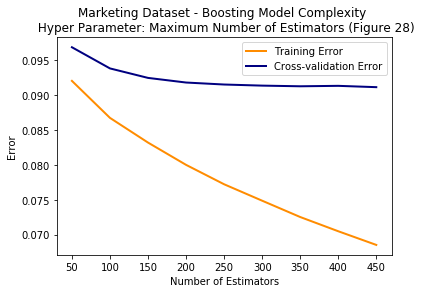

train_scores = [0.90796915 0.91326982 0.91680886 0.92000031 0.92278099 0.92513509
 0.92747338 0.92951149 0.9314706 ]
test_scores = [0.90315029 0.90618375 0.90754243 0.90820606 0.90849047 0.90864845
 0.90874327 0.90868006 0.90886965]
Optimal max depth =  450  Minimum Error =   0.0911303493510276


In [13]:
np.random.seed(55)
classifier = GradientBoostingClassifier()


estimators = np.arange(50,500,50) 
train_scores, test_scores = validation_curve( classifier, X_train, y_train, param_name="n_estimators", param_range=estimators,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title("Marketing Dataset - Boosting Model Complexity \n Hyper Parameter: Maximum Number of Estimators (Figure 28)")
plt.xlabel("Number of Estimators")
plt.ylabel("Error")



lw = 2
plt.plot(estimators, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(estimators, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal max depth = ",  estimators[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )







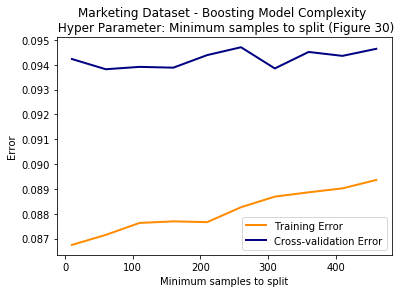

train_scores = [0.91325402 0.91285113 0.91236926 0.91230606 0.91233766 0.91173729
 0.91131071 0.91113692 0.91097892 0.91063923]
test_scores = [0.90577295 0.90618376 0.90608897 0.90612054 0.90561495 0.90529896
 0.90615212 0.90548851 0.90564653 0.90536213]
Optimal value =  60  Minimum Error =   0.0938162379497871


In [14]:
np.random.seed(55)
classifier = GradientBoostingClassifier()
estimators = np.arange(10,500,50) 

train_scores, test_scores = validation_curve( classifier, X_train, y_train, param_name="min_samples_split", param_range=estimators,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title("Marketing Dataset - Boosting Model Complexity \n Hyper Parameter: Minimum samples to split (Figure 30)")
plt.xlabel("Minimum samples to split")
plt.ylabel("Error")


lw = 2
plt.plot(estimators, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(estimators, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal value = ",  estimators[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )


### Create learning curve


train_scores = [0.97503511 0.95828652 0.94853699 0.93992275 0.9364862  0.93396922
 0.93208106 0.93102041 0.92922795 0.92734007]
test_scores = [0.90052751 0.90305566 0.90659445 0.90668949 0.90710029 0.90713203
 0.90924915 0.90928064 0.90934377 0.90934372]
train sizes = [ 2848  5696  8544 11392 14241 17089 19937 22785 25633 28482]


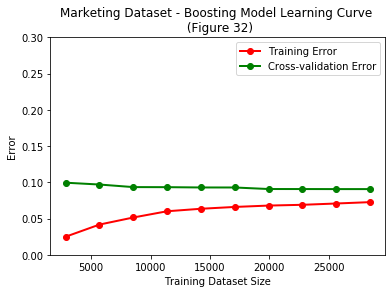

In [15]:
np.random.seed(55)
#Create timings for Training Set
estimator = GradientBoostingClassifier(n_estimators = 450, min_samples_split = 60 )
st_train_time = timeit.default_timer() 
estimator.fit(X_train, y_train)
end_train_time = timeit.default_timer() 

title = "Marketing Dataset - Boosting Model Learning Curve \n (Figure 32)"
ylim=(0.0, 0.3)


plt.title(title)
if ylim is not None:
    plt.ylim(*ylim)
plt.xlabel("Training Dataset Size")
plt.ylabel("Error")
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X_train, y_train, cv=10, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 10))



train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
#test_scores_mean1 = np.mean(test_scores1, axis=1)

print("")
    
lw = 2
plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r",
             label="Training Error",  lw=lw)
plt.plot(train_sizes, (1- test_scores_mean), 'o-', color="g",
             label="Cross-validation Error",  lw=lw)

plt.legend(loc="best")
print("train_scores =", train_scores_mean)
print("test_scores =", test_scores_mean)
print("train sizes =", train_sizes)

plt.show()


### Predict on Testing set

In [16]:
st_pred_time = timeit.default_timer() 
y_pred = estimator.predict(X_test)
end_pred_time = timeit.default_timer() 

pred_time = end_pred_time - st_pred_time

print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred, target_names=['y', 'n']))
print("AUC =", roc_auc_score(y_test, y_pred))
print("Prediction Time = ", pred_time)
print("Training Time = ", end_train_time - st_train_time)


Accuracy: 91.01297552344441%
[[11582   400]
 [  819   763]]
              precision    recall  f1-score   support

           y       0.93      0.97      0.95     11982
           n       0.66      0.48      0.56      1582

    accuracy                           0.91     13564
   macro avg       0.80      0.72      0.75     13564
weighted avg       0.90      0.91      0.90     13564

AUC = 0.724458738254875
Prediction Time =  0.07237189999978
Training Time =  18.170847600000343


In [ ]:
estimator.n_features_